In [8]:
from __future__ import absolute_import, division, print_function

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [9]:
# Tensorflow and tf.keras
from tensorflow.keras import datasets, layers, models


In [10]:
# Loading the datasets and splitting into test and train sets
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [11]:
# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
# Checking the shape of database
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [13]:
# Scaling the values to a range of 0 to 1 before feeding to the neural network model
train_images = train_images / 255.0
test_images = test_images / 255.0

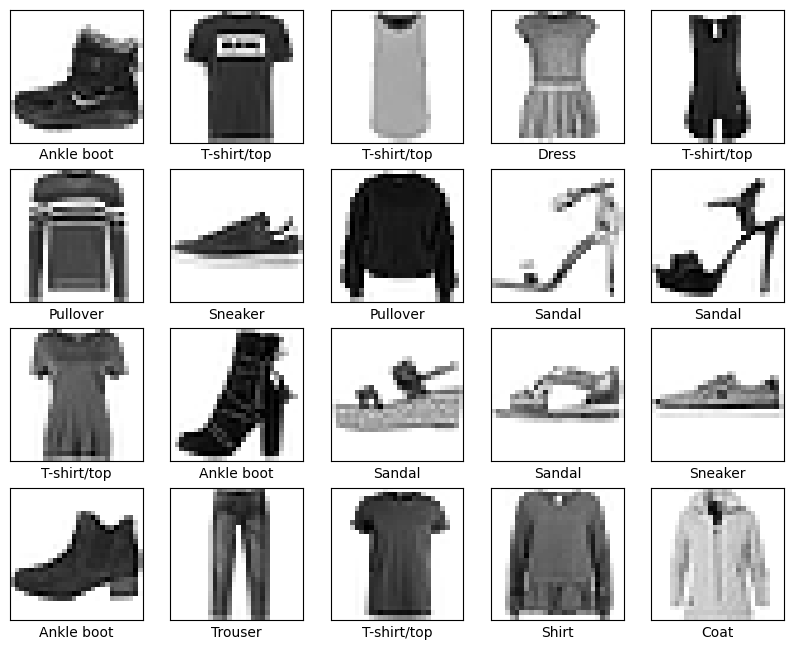

In [14]:
# Display the first 20 images from the train set
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
# Building the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [16]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
# Reshape data for CNN
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)


In [18]:
# Train the model
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 0.7755 - loss: 0.6173
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.8880 - loss: 0.3064
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9061 - loss: 0.2579
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9185 - loss: 0.2204
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9290 - loss: 0.1915


In [19]:
# Creating a prediction model
predictions = model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


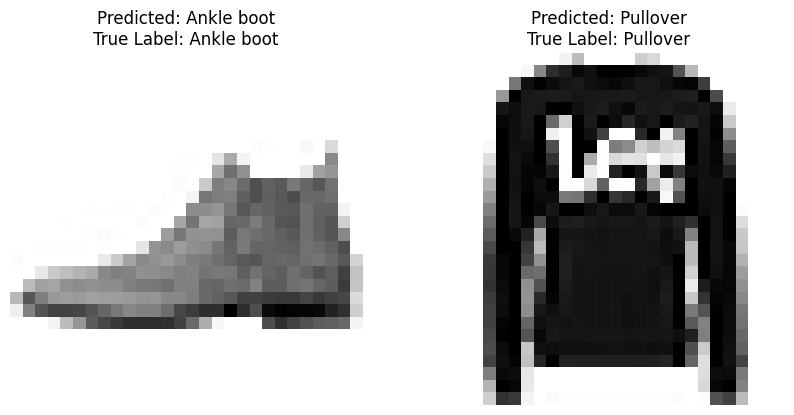

In [20]:
# Plot the first two test images, their predicted label, and the true label
plt.figure(figsize=(10, 5))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title("Predicted: " + class_names[np.argmax(predictions[i])] + "\nTrue Label: " + class_names[test_labels[i]])
    plt.axis('off')
plt.show()

In [21]:
# Making predictions for the 12th model
prediction_12th = np.argmax(predictions[11])
print("Prediction for the 12th model:", class_names[prediction_12th])

Prediction for the 12th model: Sandal
